# Data Science Academy Assignment Audition -  COMPFEST 12 2020
#### Reported by:
1. Adolf Yoshua Marbun
2. Vanessa Gabriela
3. Gabriella Dwiutari

## Latar Belakang 

Manusia selalu berusaha untuk memenuhi berbagai macam kebutuhan dalam kehidupannya. Banyak faktor yang mempengaruhi manusia untuk memenuhi kebutuhannya seperti, finansial, kesadaran, dan keberadaan barang atau jasa.  Berdasarkan tingkat kebutuhannya, kebutuhan manusia dapat dikelompokkan menjadi tiga kelompok, yaitu kebutuhan primer, sekunder, dan tersier. Kebutuhan primer merupakan kebutuhan pokok yang wajib dipenuhi oleh seseorang untuk menjamin kelangsungan hidupnya. Apabila kebutuhan ini tidak dapat dipenuhi, maka kebutuhan lainnya tidak dapat dipenuhi. Kebutuhan primer melibatkan sandang, pangan, dan papan. Kebutuhan sekunder adalah kebutuhan yang dipenuhi setelah memenuhi kebutuhan primer dan dapat membuat hidup manusia menjadi lebih baik. Kebutuhan sekunder yang tidak terpenuhi, tidak akan mempengaruhi kelangsungan hidup manusia. Contoh dari kebutuhan sekunder adalah perabotan rumah, olahraga, hiburan dan sebagainya. Tetapi kebutuhan sekunder setiap individu akan sangat dipengaruhi kebutuhan mereka masing-masing. Kebutuhan tersier seringkali dikatakan sebagai kebutuhan akan barang mewah. Tujuan dari kebutuhan tersier biasanya berkaitan dengan tingkatan sosial seseorang. Salah satu kebutuhan tersier adalah alat transportasi seperti motor, mobil, pesawat pribadi, dan sebagainya.

Seiring dengan kemajuan teknologi, mobil dianggap sebagai suatu kebutuhan penting karena dapat mempermudah hidup manusia dalam aspek efisiensi waktu. Banyaknya keluaran mobil terbaru ditambah gencarnya periklanan tentang mobil, menyebabkan konsumen memiliki kesempatan yang lebih luas untuk menukar atau membeli mobil baru sesuai dengan keinginan dan kebutuhannya. Akibatnya, terdapat  pasar jual beli mobil bekas yang kelayakannya tetap diperhitungkan sebelum diperjualbelikan kepada konsumen. Hal ini terbukti dengan banyaknya permintaan konsumen terhadap pembelian mobil bekas di India.

Konsumen saat ini sudah menjadikan barang bekas sebagai opsi dalam membeli kebutuhan karena kualitasnya yang terjaga. Salah satu produk tersebut adalah mobil bekas. Harga mobil bekas yang jauh lebih murah dibandingkan mobil baru memiliki daya tarik sendiri oleh para konsumen. Dengan harga yang lebih murah, konsumen dapat memperoleh fasilitas yang tidak kalah saing dengan mobil baru. Dalam menjual mobil, beberapa faktor yang akan mempengaruhi harga jualnya adalah kualitas produk, merek mobil, promosi, jarak tempuh, dsb.

India dikenal sebagai salah satu negara dengan kemajuan industri otomotif yang cukup baik. Sampai saat ini pasar jual beli mobil bekas di India terus mengalami perkembangan, didukung dengan harga mobil bekas yang murah. Pada tahun 2017, pendapatan terbesar India diperoleh dari sektor transportasi jalan yang mencapai 3.6 Miliar Rupee. Adanya pembangunan ekonomi serta perluasan jalan di India, juga menyebabkan peningkatan jumlah kendaraan. Di tahun 2017, India mampu memproduksi kendaraan dengan kapasitas sebesar 35 juta kendaraan dan 50% segmen tersebut didominasi oleh perusahaan kendaraan Maruti. 

Dalam laporan ini, data penjualan mobil di India akan ditinjau untuk mencari faktor-faktor yang mempengaruhi harga penjualan mobil, baik untuk mobil bekas maupun mobil baru. Selain itu juga akan ditinjau perkembangan penjualan mobil di India dari tahun 1997 sampai 2017. 


## Jawaban Pertanyaan

Data yang digunakan adalah data set **used_car_prediction.csv**. Sebelum dilakukan pengolahan data, dilakukan data cleaning terlebih dahulu dan kemudian dibutuhkan suatu asumsi terhadap data outlier. 

**Asumsi**: Berdasarkan data yang sudah dibersihkan, terdapat satu titik ekstrim bernilai 6,500,000 km yang akan disebut sebagai outlier, yaitu jarak yang ditempuh oleh mobil tipe BMW X5 xDrive 30d M Sport tahun 2017, dengan bahan bakar Diesel. Merujuk pada referensi, rata-rata total jarak yang dapat ditempuh pada mobil berbahan bakar diesel adalah 500,000 km. Jika dibandingkan dengan titik tersebut, nilainya sangat jauh diatas rata-rata. Kecepatan rata-rata mobil di India (mobil pada umumnya) adalah 22.7 km/jam. Dilakukan pengandaian bahwa dalam 1 hari mobil bergerak selama 24 jam. Sehingga, selama 3 tahun (sampai dengan tahun 2020), mobil bergerak selama 26,280 jam. Maka, dalam kurun waktu 3 tahun, mobil tersebut hanya mampu menempuh jarak sejauh  596,556 km. Dari perhitungan tersebut, sangat tidak memungkin mobil BMW tipe X5 untuk menempuh 6.5 juta kilometer hanya dalam kurun waktu 3 tahun. Sehingga, data tersebut akan dianggap sebagai outlier. 


### Data Cleaning

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

In [6]:
'''Step 1: Import file'''
cars = pd.read_csv('used_car_data.csv') 

# Check if file has NaN values

# Change column name for "Mileage (kmpl)"
cars.rename(columns={'Mileage': 'Mileage (kmpl)'}, inplace=True)

# Remove kmpl and km/kg
def remove_kmkgpl(val):
  if str(val).endswith(' km/kg'):
    new_val = str(val).replace(' km/kg', '')
    new_mileage = float(new_val)/1404.60
    return round(float(new_mileage), 2)

  if str(val).endswith(' kmpl'):
    new_val = str(val).replace(' kmpl', '')
    return round(float(new_val), 2)

  if str(val) == 'NaN':
    return str(val)
cars['Mileage (kmpl)'] = cars['Mileage (kmpl)'].apply(remove_kmkgpl)

# Fill the missing value in Mileage (kmpl) with Mean of Mileage
cars['Mileage (kmpl)'] = cars['Mileage (kmpl)'].fillna(cars['Mileage (kmpl)'].mean())

# Remove CC
def remove_CC(val):
  if str(val).endswith(' CC'):
    new_val = str(val).replace(' CC', '')
    return round(float(new_val), 2)
cars['Engine'] = cars['Engine'].apply(remove_CC)

# Change column name for "Mileage (kmpl)"
cars.rename(columns={'Engine': 'Engine (CC)'}, inplace=True)

cars = cars.loc[(cars['Engine (CC)'].notnull() & cars['Seats'].notnull() & cars['Power'].notnull())]

# Remove bhp
def remove_bhp(val):
  if str(val).endswith(' bhp'):
    new_val = str(val).replace(' bhp', '')
    return new_val
cars['Power'] = cars['Power'].apply(remove_bhp)

# Change column name for "Power (bhp)"
cars.rename(columns={'Power': 'Power (bhp)'}, inplace=True)

# Replace null value with 0 
cars['Power (bhp)'] = cars['Power (bhp)'].replace('null', 0)

# Convert Power (bhp) data types as float
cars['Power (bhp)'] = cars['Power (bhp)'].astype('float64')

# Set index
cars.index = range(len(cars['Name']))

cars = cars.drop(cars[(cars['Kilometers_Driven'] == 6500000)].index)
cars.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage (kmpl),Engine (CC),Power (bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,0.02,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,0.02,814.0,55.20,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,1.95


### 1. Merek mobil apa saja yang tersedia dan ada berapa banyak mobil untuk tiap merek tersebut?

Dibawah merupakan tabel brand mobil yang tercatat dari data dan jumlah mobil untuk masing-masing brand.

In [7]:
cars['Brand'] = cars['Name'].apply(lambda x: x.split()[0]).str.lower()

cars_brand = cars.groupby('Brand')['Brand'].count()
print(cars_brand)

Brand
ambassador          1
audi              236
bentley             1
bmw               261
chevrolet         121
datsun             13
fiat               25
force               3
ford              298
honda             601
hyundai          1100
isuzu               3
jaguar             40
jeep               15
lamborghini         1
land               57
mahindra          272
maruti           1197
mercedes-benz     318
mini               26
mitsubishi         27
nissan             91
porsche            18
renault           145
skoda             173
smart               1
tata              186
toyota            410
volkswagen        315
volvo              21
Name: Brand, dtype: int64


### 2.	Kota apa yang memiliki mobil bekas paling banyak?

Kota yang memiliki mobil bekas paling banyak adalah kota Pune dengan 197 mobil bekas, sedangkan kota dengan mobil bekas yang paling sedikit adalah kota Kolkata dengan 31 mobil bekas. 

In [9]:
second = cars[cars['Owner_Type'] !="First"]
group_city = second.groupby('Location')['Location'].count().sort_index(ascending=False)
print(group_city)

Location
Pune          197
Mumbai        133
Kolkata        31
Kochi          37
Jaipur        111
Hyderabad      84
Delhi          96
Coimbatore     65
Chennai       156
Bangalore     124
Ahmedabad      38
Name: Location, dtype: int64


### 3.	Bagaimana distribusi tahun edisi mobil-mobil bekas tersebut?

Berdasarkan gambar dibawah, distribusi tahun edisi mobil bekas memiliki pemusatan ke kiri (__negatively-skewed__), dengan variabel skewness sebesar -0.562, dan standar deviasi sebesar 3.458. Distribusi tersebut memiliki median pada tahun 2011, rata-rata pada tahun 2010, dan modus pada tahun 2011. Dari grafik dapat dilihat bahwa para konsumen di India memiliki kecenderungan untuk menjual mobil dengan tahun produksi yang lebih baru.

-0.5617421554260441 3.4583843019157063 2010.8208955223881 2011.0 0    2011
dtype: int64


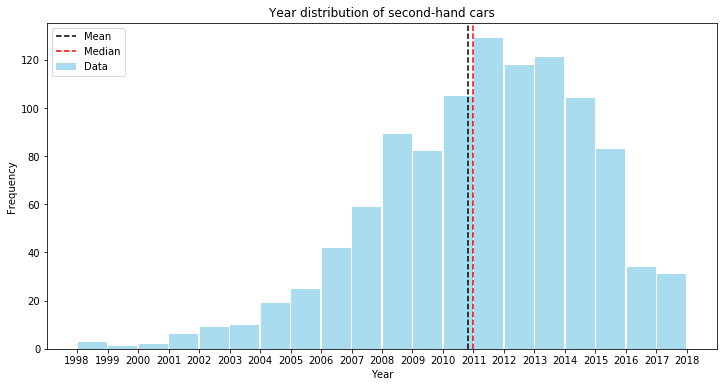

In [11]:
second = cars[cars['Owner_Type'] !="First"]
tahun = second['Year'].unique()
sort_tahun=sorted(tahun)
year = second['Year']

fig = plt.figure(figsize=(12,6))
print(year.skew(), year.std(), year.mean(), year.median(), year.mode())
plt.axvline(year.mean(), color='k', linestyle='dashed')
plt.axvline(year.median(), color='r', linestyle='dashed')
plt.hist(year, bins=20,color='skyblue',alpha=0.7, rwidth=0.96)
plt.xticks(sort_tahun)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Year distribution of second-hand cars')
plt.legend(['Mean', 'Median', 'Data'], loc='upper left')

### 4.	Berapa banyak mobil yang memiliki total jarak pemakaian di bawah 100.000 kilometer?

Terdapat 5433 mobil dengan total jarak pemakaian di bawah 100.000 km. 

In [12]:
less_than = cars[cars['Kilometers_Driven'] < 100000]
print(less_than['Kilometers_Driven'].count())

5433


### 5.	Pada batas berapa kilometer total jarak pemakaian bisa dikategorikan sebagai rendah atau tinggi? Sertakan argumen yang mendukung jawaban.

Untuk menentukan batas rendah dan tinggi untuk total jarak pemakaian dapat ditentukan dengan menggunakan metode K-means, yaitu salah metode algoritma clustering yang memiliki tujuan untuk membagi data menjadi beberapa kelompok. K-means akan membagi data menjadi k buah kelompok yang diinginkan. Pada setiap kluster terdapat titik pusat (centroid) yang akan merepresentasikan cluster tersebut. Ide dari metode ini adalah menghitung jarak terdekat suatu data ke sebuah titik centroid secara numerik. Algoritma metode ini berakhir ketika titik centroid  tidak lagi berubah. Pengolahan data menggunakan R Studio. Variabel total jarak pemakaian dibagi menjadi 2 kluster, yaitu rendah dan tinggi. Gambar II.3 menunjukkan pembagian total jarak pemakaian dalam 2 kluster. 

Batas total kilometer pemakaian dikategorikan rendah adalah 69,972 Kilometer atau < 70,000 Kilometer dengan titik centroid berada pada 40,942.22 Kilometer. Sedangkan untuk Batas total kilometer pemakaian yang dikategorikan tinggi adalah ≥ 70,000 Kilometer dengan titik centroid berada pada 99,028.81 Kilometer.

### 6.	Apakah terdapat outlier pada kolom Kilometers_Driven? Sertakan argumen yang mendukung jawaban.

Ya, terdapat outlier. Gambar II.4 menunjukkan terdapat banyak outlier pada variabel Kilometers_driven. Selain itu, boxplot untuk kolom Kilometers_Driven setiap tahunnya juga menunjukkan terdapat banyak outlier di tahun tertentu seperti yang ditunjukkan Gambar II.4 (a).

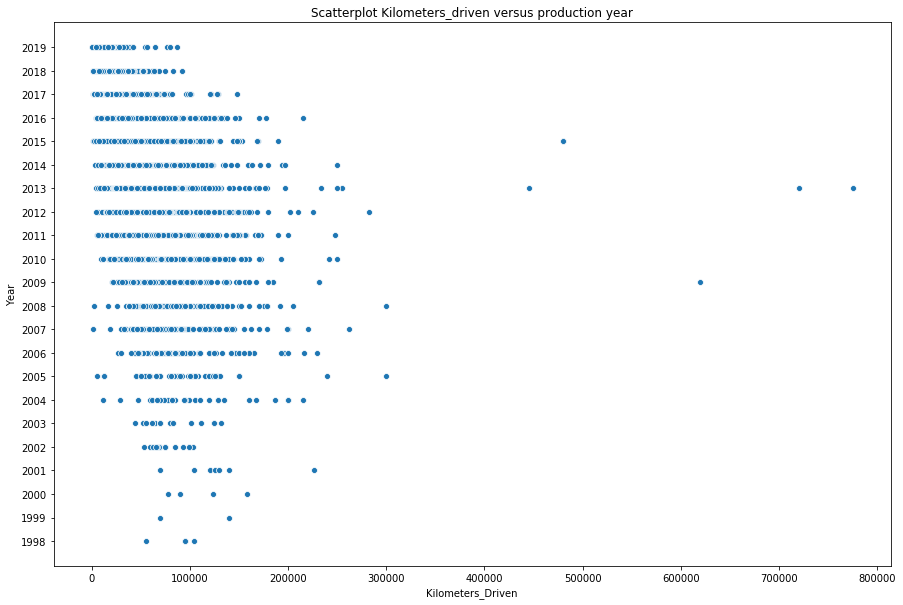

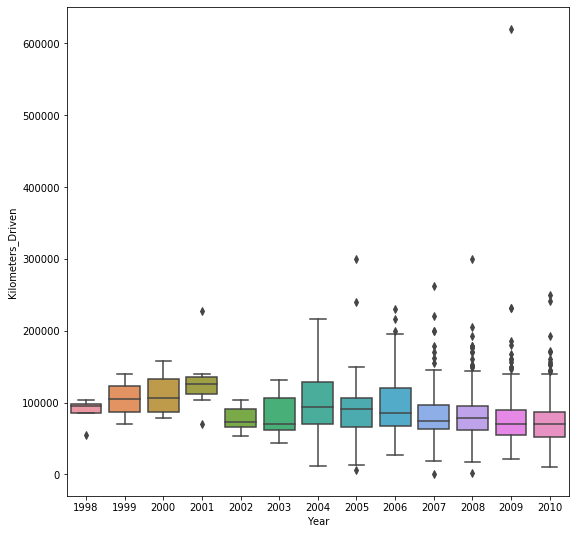

In [13]:
fig = plt.figure(figsize=(15,10))
sns.scatterplot(y = 'Year', x = 'Kilometers_Driven', data = cars)
plt.yticks(sorted(cars['Year'].unique()))
plt.title('Scatterplot Kilometers_driven versus production year')
plt.show()

#ini misal datanya ambil yang sebelum 2010, biar keliatan tebelnya boxplot.  
fig = plt.figure(figsize=(9,9))
cars_ = cars[cars['Year'] <= 2010]
sns.boxplot(y = 'Kilometers_Driven', x = 'Year', data = cars_)
plt.show()

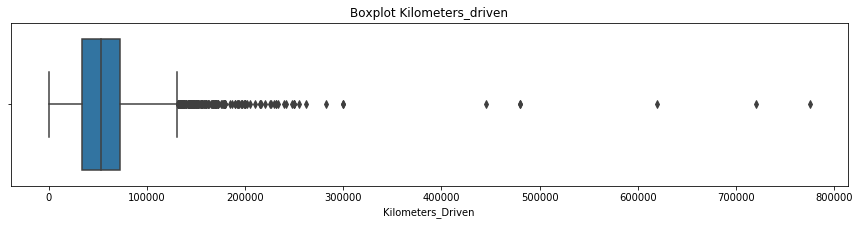

33911.5
73000.0
39088.5
-24721.25 131632.75


In [14]:
fig = plt.figure(figsize=(15,3))
sns.boxplot(data=cars,x=cars['Kilometers_Driven'])
plt.title('Boxplot Kilometers_driven')
#sns.scatterplot(y = 'Year', x = 'Kilometers_Driven', data = cars)
plt.show()

#IQR adalah salah satu metode mencari outlier dengan mengukur  variabilitas data dengan membagi dataset menjadi kuartil.
Q1=cars['Kilometers_Driven'].quantile(0.25)
Q3=cars['Kilometers_Driven'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
print(Lower_Whisker, Upper_Whisker)

### 7.	Apakah tahun pembuatan mobil berpengaruh terhadap total jarak pemakaian? Sertakan argumen yang mendukung jawaban.

Ya, berpengaruh. Pengaruh tahun pembuatan mobil dengan total jarak pemakaian dapat dilihat dari korelasi antar dua variabel tersebut menggunakan matriks korelasi dengan metode .corr() (correlation) pada syntax Python. Matriks korelasi juga dapat direpresentasikan dengan heatmap seperti Gambar II.5. Besarnya koefisien korelasi variabel tahun pembuatan dengan total jarak pemakaian adalah -0.172, artinya hubungan yang terjadi adalah korelasi negatif: berbanding terbalik. 

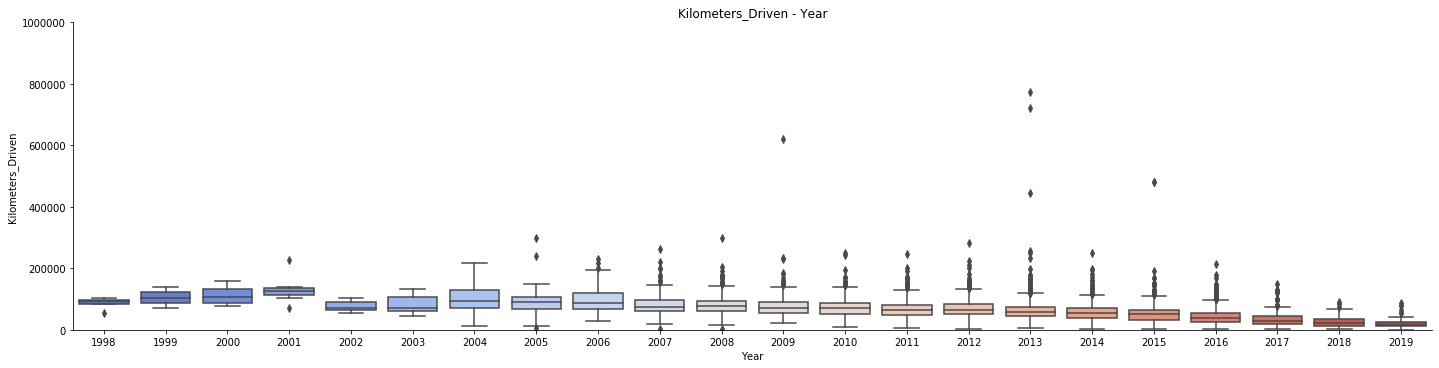

In [15]:
sns.catplot(x = 'Year', y = 'Kilometers_Driven', data = cars, palette = 'coolwarm', kind= 'box', height = 5, aspect = 4)
plt.ylim([0, 1000000])
plt.title('Kilometers_Driven - Year')
plt.show()

                       Year  Kilometers_Driven  Mileage (kmpl)  Engine (CC)  \
Year               1.000000          -0.448730        0.291367    -0.053340   
Kilometers_Driven -0.448730           1.000000       -0.132541     0.154544   
Mileage (kmpl)     0.291367          -0.132541        1.000000    -0.508880   
Engine (CC)       -0.053340           0.154544       -0.508880     1.000000   
Power (bhp)        0.069237          -0.016353       -0.375385     0.842249   
Seats              0.012399           0.210575       -0.268236     0.393644   
Price              0.305509          -0.168492       -0.264062     0.658364   

                   Power (bhp)     Seats     Price  
Year                  0.069237  0.012399  0.305509  
Kilometers_Driven    -0.016353  0.210575 -0.168492  
Mileage (kmpl)       -0.375385 -0.268236 -0.264062  
Engine (CC)           0.842249  0.393644  0.658364  
Power (bhp)           1.000000  0.108948  0.759315  
Seats                 0.108948  1.000000  0.05262

<function matplotlib.pyplot.show(*args, **kw)>

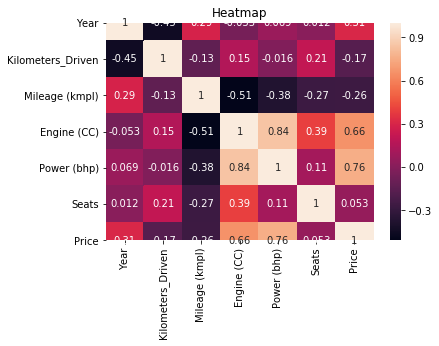

In [16]:
print(cars.corr())
sns.heatmap(cars.corr(), annot=True)
plt.title('Heatmap')
plt.show

### 8.	Berapa banyak mobil yang merupakan kepemilikan ketiga atau lebih?

Terdapat 119 mobil yang merupakan kepemilikan ketiga atau lebih. 

In [17]:
bekas2 = cars[(cars["Owner_Type"] != 'First') & (cars["Owner_Type"] != 'Second')]
bekas2.groupby('Owner_Type').count()['Name']

Owner_Type
Fourth & Above      8
Third             111
Name: Name, dtype: int64

### 9.	Tipe bahan bakar apa yang memiliki mileage (konsumsi bahan bakar) paling hemat?

Penentuan mileage paling hemat dapat dilakukan dengan melakukan agregasi terhadap data mileage dan mengelompokkannya berdasarkan tipe bahan bakar yang terdapat pada data tersebut. Diperoleh bahwa Diesel merupakan tipe bahan bakar paling hemat dengan rata-rata penggunaan hanya sebesar 18.639484 kmpl, artinya setiap 1 liter bahan bakar yang digunakan dapat menempuh jarak sejauh 18.63 km.

In [18]:
cars.groupby('Fuel_Type').aggregate({'Mileage (kmpl)': ['mean', 'max', 'min']})

Mileage (kmpl)                      
                    mean        max        min
Fuel_Type                                     
CNG             0.017857   0.020000   0.010000
Diesel         18.640319  28.400000   0.000000
Electric       17.866369  17.866369  17.866369
LPG             0.014000   0.020000   0.010000
Petrol         17.483990  26.000000   0.000000

### 10.	Apa saja faktor-faktor yang mempengaruhi harga mobil bekas di India? Sertakan argumen yang mendukung jawaban. 

Dapat dilihat bahwa terdapat kecenderungan bahwa mileage (tingkat konsumsi bahan bakar dalam satuan kmpl) yang semakin tinggi akan mengakibatkan harga mobil yang semakin rendah. Pada scatter plot dapat dilihat terdapat persebaran data yang merata antara mileage yang tinggi maupun mileage yang rendah. Dengan menggunakan matriks korelasi pada nomor 7, diketahui mileage memiliki korelasi negatif dengan harga sehingga terbukti bahwa mileage yang semakin besar akan memiliki harga yang cenderung kecil. Tetapi, terdapat korelasi yang kuat antara harga (Price) dengan Engine (CC). Hal ini dibuktikan dengan nilai dari matriks korelasi yaitu 0.66 atau memiliki korelasi positif antara kedua data, sehingga semakin besar nilai CC suatu mesin, mobil bekas akan memiliki harga jual yang semakin tinggi.

C:\Users\TEMP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 350000)

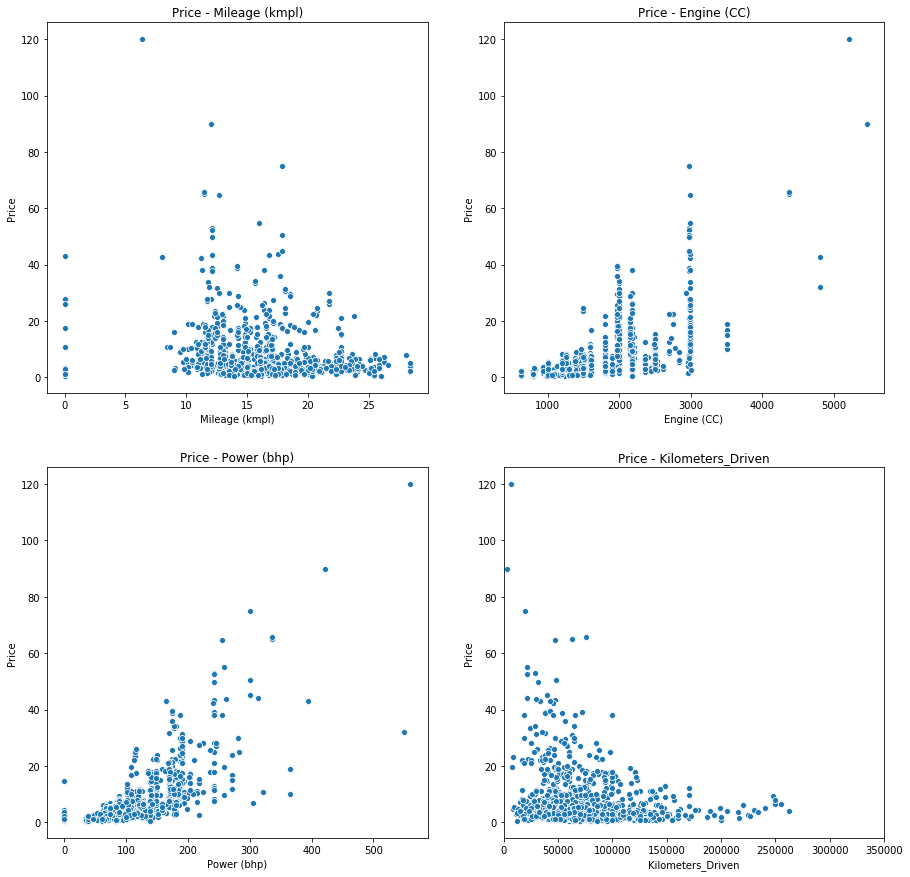

In [19]:
fig = plt.figure(figsize = (15,15))
second_hand = cars[cars["Owner_Type"] != 'First']
second_hand['Brand'] = second_hand['Name'].apply(lambda x: x.split()[0]).str.lower()
#plot price vs Mileage(kmpl)
ax1 = fig.add_subplot(2,2,1)
plot1 = sns.scatterplot(y = 'Price', x = 'Mileage (kmpl)', data = second_hand)
plt.title('Price - Mileage (kmpl)')
#plot price vs Engine(CC)
ax2 = fig.add_subplot(2,2,2)
plot2 = sns.scatterplot(y = 'Price', x = 'Engine (CC)', data = second_hand)
plt.title('Price - Engine (CC)')
#plot price vs Power(bhp)
ax4 = fig.add_subplot(2,2,3)
plot4 = sns.scatterplot(y = 'Price', x = 'Power (bhp)', data = second_hand)
plt.title('Price - Power (bhp)')
#plot price vs kilometers_driven
ax5 = fig.add_subplot(2,2,4)
plot5 = sns.scatterplot(y = 'Price', x = 'Kilometers_Driven', data = second_hand)
plt.title('Price - Kilometers_Driven')
plt.xlim([0, 350000])

Selanjutnya akan ditinjau hubungan korelasi antara daya suatu mobil terhadap harga yang ditentukan. Semakin besar daya suatu mobil, harga mobil tersebut akan cenderung lebih tinggi dibandingkan mobil dengan daya rendah. Hal ini didukung dengan korelasi positif antara daya dengan harga sebesar 0.76. Korelasi selanjutnya yang akan diperiksa yaitu antara jarak tempuh mobil terhadap harga yang ditentukan. Gambar II.7 (b) menunjukkan keterbalikan antara jarak tempuh dengan harga mobil, sedangkan pada umumnya harga mobil akan lebih tinggi jika jarak tempuh mobil tersebut rendah. Hal ini dibuktikan juga dengan negatifnya nilai korelasi antara harga dan jarak tempuh. 

Text(0.5, 1, 'Price - Year')

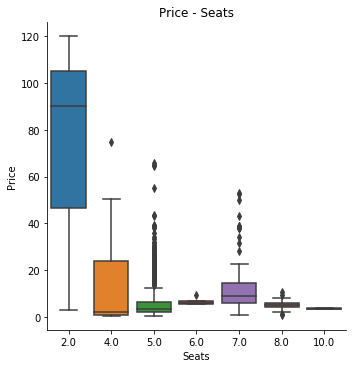

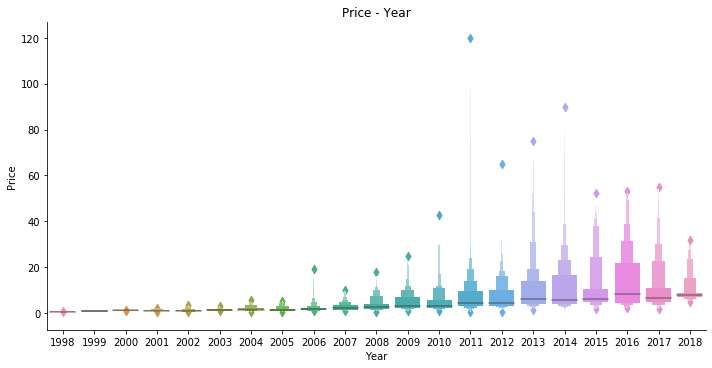

In [20]:
#boxplot price vs seats
ax3 = fig.add_subplot(1,2,1)
plot3 = sns.catplot(y = 'Price', x = 'Seats', data = second_hand, kind = 'box')
plt.title('Price - Seats')
#boxenplot price vs year
ax6 = fig.add_subplot(1,2,2)
plot6 = sns.catplot(y = 'Price', x = 'Year', data = second_hand, kind = 'boxen', height = 5, aspect = 2)
plt.title('Price - Year')

Selanjutnya adalah melihat korelasi antara harga (Price) dan jumlah kursi (Seats) pada mobil. Mobil dengan 2 tempat duduk memiliki harga yang jauh lebih tinggi dibandingkan mobil dengan 4 atau lebih tempat duduk. Namun, dari boxplot dapat dilihat bahwa harga antara mobil dengan 4 - 10 tempat duduk memiliki nilai median  yang serupa. Sehingga, tidak dapat dikatakan jumlah tempat duduk merupakan faktor yang mempengaruhi harga suatu mobil. Dilihat dari matriks korelasi, nilai korelasi antara harga dengan jumlah tempat duduk hanya sebesar 0.052. Hubungan yang bisa diperoleh dari variabel harga (Price) terhadap Year adalah terjadinya peningkatan median harga mobil bekas untuk mobil dengan tahun produksi yang lebih baru. Hal ini dapat terjadi karena keadaan mobil bekas yang masih relatif lebih bagus untuk mobil yang diproduksi pada tahun 2010 keatas dibandingkan dengan tahun produksi 2010 kebawah.

### Analisa Tambahan

Berdasarkan gambar diatas, harga mobil bekas paling tinggi berada di kota Delhi, yaitu merk Lamborghini Gallardo Coupe. Kemudian dapat dilihat bahwa Kolkata merupakan kota dengan jumlah mobil bekas yang paling sedikit jika dibandingkan dengan kota lainnya. Namun, perlu ditambahkan juga bahwa banyak aspek yang dapat mempengaruhi persebaran data tersebut seperti jenis mobil yang dijual, besar CC mobil, daya mobil, tahun produksi, dsb. Secara umum tidak dapat dikatakan bahwa harga penjualan mobil memiliki korelasi yang kuat dengan lokasi tempat mobil bekas tersebut dijual. 

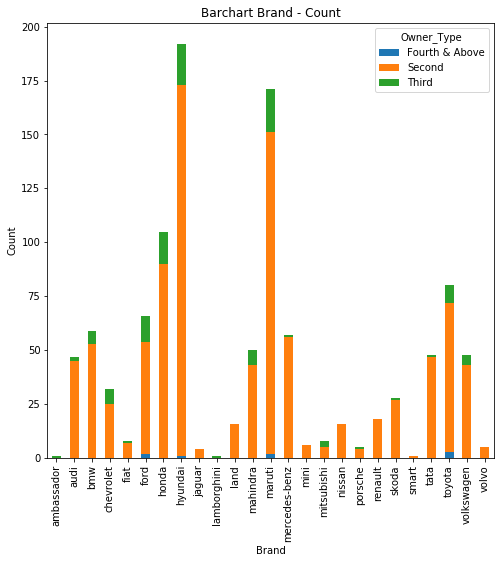

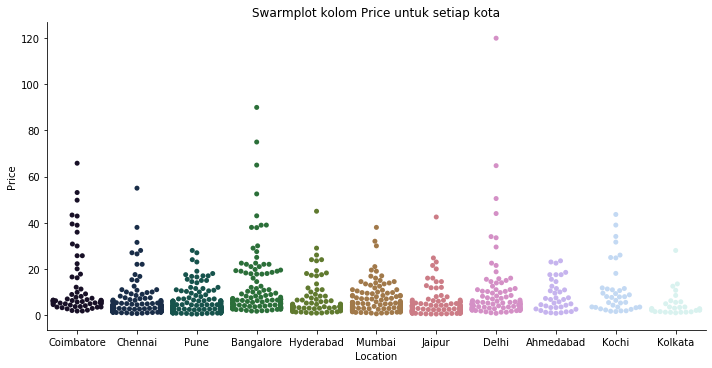

In [21]:
#stacked barchart plot of used car brand in India
price_location = pd.crosstab(index=second_hand["Brand"], 
                          columns=second_hand["Owner_Type"])
price_location.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)
plt.ylabel('Count')
plt.title('Barchart Brand - Count')
plt.show()

sns.catplot(x = 'Location', y = 'Price', palette = "cubehelix", data = second_hand, kind = 'swarm', height = 5, aspect = 2)
plt.title('Swarmplot kolom Price untuk setiap kota')
plt.show()

Mobil bekas (second hand) yang paling banyak diminati adalah merk Hyundai, kemudian disusul oleh Maruti dan Honda. Sama halnya untuk kepemilikan ketiga (bar hijau), ketiga merk mobil tersebut masih yang paling diminati. Jika ditinjau dari segi konsumsi bahan bakar (mileage), rata-rata mileage untuk Hyundai, Maruti, dan Honda masing-masing adalah 17.001094 kmpl, 18.427193 kmpl, 16.188571 kmpl. Mobil bekas dengan tiga merk tersebut dianggap cukup efisien untuk menempuh jarak yang jauh. Hal ini dapat menjawab alasan mengapa masyarakat India cenderung memilih untuk menggunakan mobil bekas dengan tiga tipe tersebut. Sama halnya untuk Gambar III.3, rentang harga mobil yang ditawarkan oleh produsen mobil bekas di India untuk tiga merk diatas tidak selebar rentang harga mobil merk lain, artinya harga tersebut masih dapat dijangkau oleh masyarakat India. Hal ini juga yang menyebabkan tiga tipe mobil ini cukup banyak diminati. 

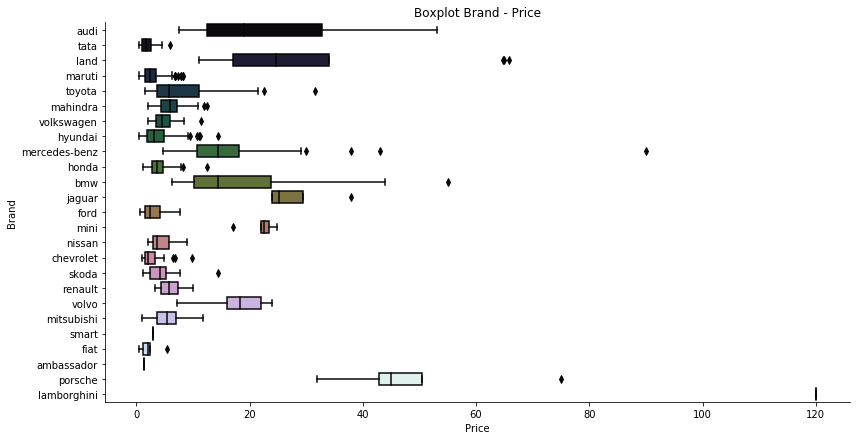

In [22]:
#cubehelix plot brand vs price
sns.catplot(y = 'Brand', x = 'Price', palette = "cubehelix", data = second_hand, kind = 'box', height = 6, aspect = 2)
plt.title('Boxplot Brand - Price')
plt.show()

## Kesimpulan

Melalui pengolahan data mobil bekas di India, diperoleh beberapa kesimpulan yaitu :
1.	Merek mobil yang paling diminati di India adalah Maruti, kemudian Hyundai.
2.	Kota yang memiliki mobil bekas paling banyak adalah kota Pune.
3.	Konsumen di India memiliki kecenderungan untuk menjual mobil dengan tahun produksi yang lebih baru.
4.	Terdapat 5433 mobil dengan total jarak pemakaian di bawah 100,000 Km. 
5.	Batas Kilometers_Driven dikategorikan rendah adalah kurang dari 70,000 Km dengan rataan kategori rendah adalah 40,942.22 Km.
6.	Data pada variabel Kilometers_driven memiliki banyak data outliers.
7.	Tahun pembuatan mobil dan jarak tempuh berkorelasi kebalik. 
8.	Terdapat 119 mobil yang merupakan kepemilikan ketiga atau lebih. 
9.	Diesel merupakan tipe bahan bakar paling hemat.
10.	Engine, Kilometers_driven, power, year, dan mileage merupakan faktor yang mempengaruhi harga mobil bekas.

## Daftar Pustaka

[1] Research Department, S. (2020, June 8). Topic: Automotive industry in India. Retrieved July 16, 2020, from https://www.statista.com/topics/3771/automotive-industry-in-india/

[2] K-means. (2020, April 08). Retrieved July 17, 2020, from https://id.wikipedia.org/wiki/K-means

[3] Used Car Research. (n.d.). Retrieved July 15, 2020, from https://www.goauto.com.au/used-car-research.html

[4] “What is the life expectancy on bmw X5 engine with 220,000 miles?”. (2012, April 21st). Retrieved July 15, 2020, from https://www.cargurus.com/Cars/Discussion-c5156_ds518859

[5] “The pros and cons of a diesel engine”. (2011, March 25th). Retrieved July 16th, 2020, from https://www.theglobeandmail.com/globe-drive/culture/commuting/the-pros-and-cons-of-a-dieselengine/article623690/#:~:text=%22You%20can%20get%20up%20to,certified%20mechanic%20I%20spoke%20with.

[6] Python for Social Sciences. (n.d.). Retrieved July 16th, 2020, from  https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/visualization/boxplot.html
